In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
%env PYDEVD_DISABLE_FILE_VALIDATION=1

env: PYDEVD_DISABLE_FILE_VALIDATION=1


In [3]:
%config IPCompleter.use_jedi=False


In [4]:
purchase = pd.read_csv("D:\Aleeza Projects\Customer behaviour analysis\QVI_purchase_behaviour (1).csv")

In [5]:
transaction =pd.read_excel("D:\Aleeza Projects\Customer behaviour analysis\QVI_transaction_data (1).xlsx")

In [6]:
#how big is my data
purchase.shape

(72637, 3)

In [7]:
transaction.shape

(264836, 8)

In [8]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [9]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [10]:
transaction.sample(9)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
6063,43300,16,16077,14221,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,1,3.8
15977,43630,242,242183,246266,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6
210567,43524,133,133051,136291,51,Doritos Mexicana 170g,2,8.8
188566,43294,55,55017,48541,10,RRD SR Slow Rst Pork Belly 150g,2,5.4
168091,43456,223,223078,223380,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4
203674,43292,269,269100,265604,27,WW Supreme Cheese Corn Chips 200g,2,3.8
136412,43546,12,12308,10989,68,Pringles Chicken Salt Crips 134g,2,7.4
199038,43408,199,199028,197679,7,Smiths Crinkle Original 330g,2,11.4
98516,43458,262,262089,261818,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [11]:
purchase.sample(9)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
5702,20503,RETIREES,Mainstream
44864,168181,OLDER SINGLES/COUPLES,Premium
69402,260182,YOUNG FAMILIES,Mainstream
34727,127211,RETIREES,Mainstream
64615,242131,YOUNG SINGLES/COUPLES,Budget
14312,53096,YOUNG SINGLES/COUPLES,Mainstream
5555,20289,MIDAGE SINGLES/COUPLES,Premium
40565,152012,OLDER FAMILIES,Budget
71241,267433,OLDER FAMILIES,Budget


In [12]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [13]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [15]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [16]:
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [17]:
transaction['DATE']=pd.to_datetime(transaction['DATE'])

In [18]:
transaction['DATE']

0        1970-01-01 00:00:00.000043390
1        1970-01-01 00:00:00.000043599
2        1970-01-01 00:00:00.000043605
3        1970-01-01 00:00:00.000043329
4        1970-01-01 00:00:00.000043330
                      ...             
264831   1970-01-01 00:00:00.000043533
264832   1970-01-01 00:00:00.000043325
264833   1970-01-01 00:00:00.000043410
264834   1970-01-01 00:00:00.000043461
264835   1970-01-01 00:00:00.000043365
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [19]:
purchase.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [20]:
transaction.duplicated().sum()

1

In [21]:
purchase.duplicated().sum()

0

In [22]:
transaction.drop_duplicates()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,1970-01-01 00:00:00.000043533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,1970-01-01 00:00:00.000043325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,1970-01-01 00:00:00.000043410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,1970-01-01 00:00:00.000043461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [23]:
transaction_copy = transaction.copy()

In [24]:
transaction_copy = transaction_copy.drop(columns=['PROD_NAME'])

In [25]:
transaction_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_QTY        264836 non-null  int64         
 6   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 14.1 MB


In [26]:
transaction_copy.corr()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
DATE,1.000000,0.001314,-0.000014,0.001171,-0.004276,-0.001265,-0.001681
STORE_NBR,0.001314,1.000000,0.950869,0.997593,0.002309,0.005295,0.003234
LYLTY_CARD_NBR,-0.000014,0.950869,1.000000,0.954919,0.001755,0.003834,0.002908
TXN_ID,0.001171,0.997593,0.954919,1.000000,0.002544,0.005343,0.003468
PROD_NBR,-0.004276,0.002309,0.001755,0.002544,1.000000,-0.004813,-0.133851
PROD_QTY,-0.001265,0.005295,0.003834,0.005343,-0.004813,1.000000,0.715307
TOT_SALES,-0.001681,0.003234,0.002908,0.003468,-0.133851,0.715307,1.000000


In [27]:
transaction_copy.corr()['TOT_SALES']

DATE             -0.001681
STORE_NBR         0.003234
LYLTY_CARD_NBR    0.002908
TXN_ID            0.003468
PROD_NBR         -0.133851
PROD_QTY          0.715307
TOT_SALES         1.000000
Name: TOT_SALES, dtype: float64

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

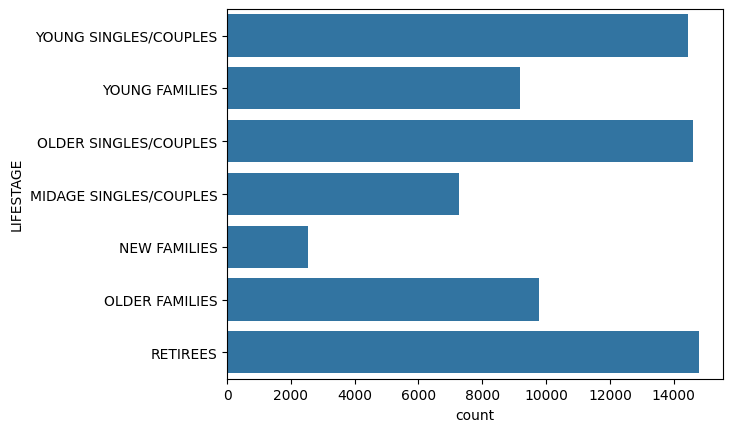

In [28]:
sns.countplot(purchase['LIFESTAGE'])
purchase['LIFESTAGE'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

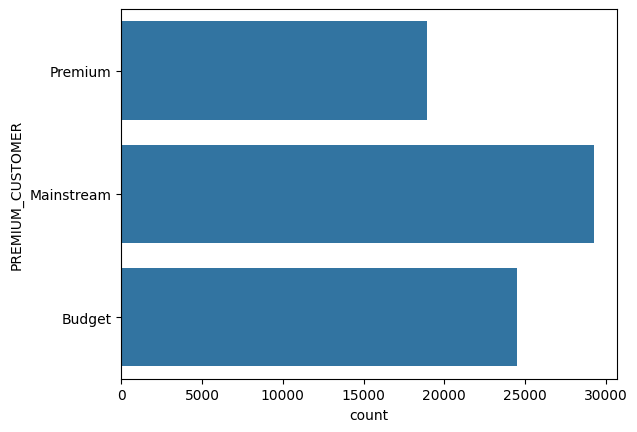

In [29]:
sns.countplot(purchase['PREMIUM_CUSTOMER'])
purchase['PREMIUM_CUSTOMER'].value_counts()

<Axes: ylabel='count'>

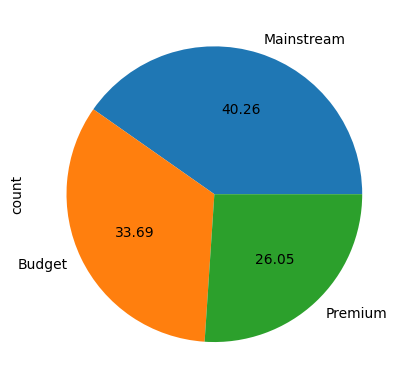

In [30]:
purchase['PREMIUM_CUSTOMER'].value_counts().plot(kind='pie',autopct ='%.2f')

In [31]:
%env PYDEVD_DISABLE_FILE_VALIDATION=1

env: PYDEVD_DISABLE_FILE_VALIDATION=1


(array([2.64834e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([  1.5 ,  66.35, 131.2 , 196.05, 260.9 , 325.75, 390.6 , 455.45,
        520.3 , 585.15, 650.  ]),
 <BarContainer object of 10 artists>)

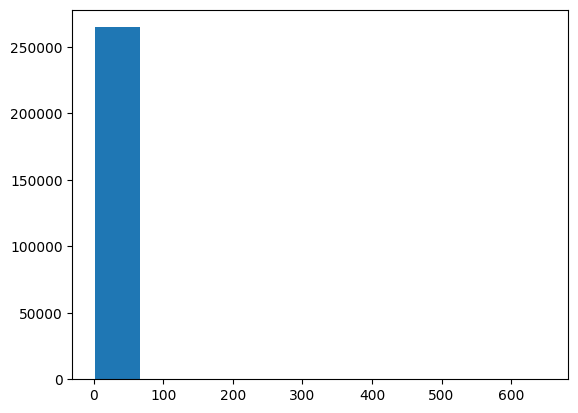

In [32]:
plt.hist(transaction['TOT_SALES'])

In [35]:
transaction['TOT_SALES'].skew()

68.5696313218127

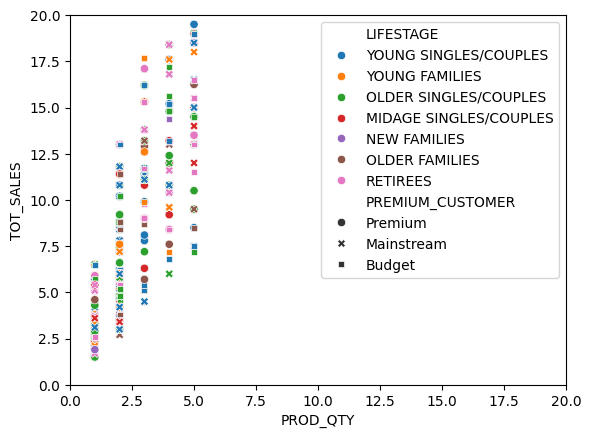

In [48]:

sns.scatterplot(x=transaction['PROD_QTY'], y=transaction['TOT_SALES'],hue =purchase['LIFESTAGE'],style = purchase['PREMIUM_CUSTOMER'])
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()

Insights from the above analysis
The above analysis shows that young couple , retirees and old couples in premium category buys more chips.